# Exploratory Data Analysis (EDA) – Lending Club Loan Portfolio

The **Lending Club** dataset was selected because it provides detailed, loan-level information suitable for analyzing real-world credit portfolio performance. It contains granular features for each loan, such as loan amount, interest rate, term, credit grade, and repayment status. This enables the calculation and comparison of key **Key Performance Indicators (KPIs)**, including *Default Rate*, *Average Loan Amount*, *Average Interest Rate*, *Portfolio Growth*, and *Loan Distribution by Grade*.

### Selection Criteria
- **Data availability and completeness:** granular, loan-level dataset publicly accessible.
- **Representativeness:** reflects the structure and behavior of a real consumer loan portfolio.
- **Compatibility with literature:** supports calculation of KPIs commonly used in international research and industry benchmarks.

### Literature Context
The first foundational paper considered is the **ECB (2022)** study *“Bank lending rates and the remuneration for risk”*, which explores the risk–return relationship in bank lending portfolios.  
The most recent reference (2025) is *“Credit Risk for Large Portfolios of Green and Brown Loans”*, which extends the Vasicek model to modern mixed portfolios emphasizing environmental (green) loans.  

### Coverage
The overall coverage of the literature spans both **European regulatory frameworks** and **industry practices**, including:
- **EBA Credit Risk Benchmarking Report (2024):** on variability of PD, LGD, and EAD across institutions.
- **IACPM White Paper (2023):** on CPM practices and the integration of data analytics and ESG metrics.
- **ECB (2022):** on pricing and credit risk sensitivity.

These studies establish a solid reference framework for comparing the results derived from the Lending Club dataset with established standards in **credit portfolio management**.


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import textwrap
import math
import os
from pathlib import Path

In [46]:
PROJECT_ROOT = Path.cwd().parents[1]

DATA_DIR = PROJECT_ROOT / "data" / "processed"
DATA_DIR.mkdir(parents=True, exist_ok=True)

In [47]:
# Configure display and plotting settings
pd.set_option("display.max_columns", 120)
sns.set(style="whitegrid")

# Load dataset
DATA_PATH = Path("../../data/loan.csv")

df = pd.read_csv(DATA_PATH, low_memory=False)
print(df.shape)
df.head()

(2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,...,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,...,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-2019,180.69,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,110299.0,0.0,...,77.0,NaN,14.0,NaN,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Ver

### Sampling for EDA Efficiency
Given that the Lending Club dataset contains over 2 million loan records, a random sample of 10,000 observations was extracted for exploratory data analysis.
This approach maintains representativeness of the data while significantly improving computational efficiency for visualizations and distribution plots.
The sampling was performed using a uniform random method with a fixed random seed to ensure reproducibility.

In [48]:
df_sample = df.sample(10000, random_state=42)

In [49]:
df[['loan_amnt','int_rate','term','grade']].describe()
df_sample[['loan_amnt','int_rate','term','grade']].describe()

,loan_amnt,int_rate
count,10000.000000,10000.000000
mean,15074.917500,13.034296
std,9205.681195,4.749020
min,1000.000000,5.310000
25%,8000.000000,9.440000
50%,12887.500000,12.680000
75%,20000.000000,15.810000
max,40000.000000,30.990000


In [50]:
# --- Dataset Overview and Structure ---

# Basic information about the dataset
print("Basic Dataset Information")
print("-" * 60)
df_sample.info()

print("\n\n Dataset Dimensions:")
print(f"Rows: {df_sample.shape[0]} | Columns: {df_sample.shape[1]}")

print("\n Checking for duplicates:")
print(df_sample.duplicated().sum())

# Display column names
print("\n Columns in dataset:")
print(list(df_sample.columns) )

Basic Dataset Information
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1758049 to 1164694
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 11.1+ MB


 Dataset Dimensions:
Rows: 10000 | Columns: 145

 Checking for duplicates:
0

 Columns in dataset:
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fe

### **Selection of KPI-Relevant Features**

The subset of variables stored in `eda_features` was intentionally selected to include only the fields that are directly relevant for **loan-portfolio analysis**, **risk assessment**, and the computation of the thesis KPIs.   From the full Lending Club dataset  we retain only the variables that describe the portfolio structure, borrower characteristics, credit history behaviour, and loan performance.

The selected features cover the four analytical dimensions established earlier in the EDA:

#### **1. Portfolio Characteristics**
- `loan_amnt`, `int_rate`, `term`, `installment`  
These define the contractual structure of each loan and are essential for KPIs such as *Average Loan Amount*, *Average Interest Rate*, and *Portfolio Composition by Term*.

#### **2. Borrower Characteristics**
- `annual_inc`, `dti`, `emp_length`, `home_ownership`, `addr_state`  
These variables describe the borrower’s financial capacity and demographic profile, supporting borrower-quality assessments and risk segmentation.

#### **3. Credit History Indicators**
- `delinq_2yrs`, `inq_last_6mths`, `revol_util`, `open_acc`, `total_acc`, `earliest_cr_line`  
These capture historical repayment behaviour and credit exposure, which are critical for understanding drivers of delinquency and default.

#### **4. Loan Performance**
- `loan_status`, `total_pymnt`, `total_rec_prncp`, `recoveries`  
These fields directly drive KPI calculations such as *Default Rate*, *Recovery Rate*, and *Payment Behaviour Metrics*.

By restricting the dataset to **KPI-aligned variables**, the subsequent Feature Engineering, KPI computation, and API exposure steps operate on a **clean, domain-aligned, and computationally efficient dataset** — consistent with best practices in Data Engineering and Credit-Risk Analytics.


In [51]:
eda_features = [
    'loan_amnt', 'int_rate', 'term', 'installment',
    'grade', 'sub_grade', 'purpose',
    'annual_inc', 'dti', 'emp_length', 'home_ownership', 'addr_state',
    'delinq_2yrs', 'inq_last_6mths', 'revol_util',
    'open_acc', 'total_acc', 'earliest_cr_line',
    'loan_status', 'total_pymnt', 'total_rec_prncp', 'recoveries',
    'issue_d'
]

df_eda = df_sample[eda_features].copy()

# Remove "Does not meet the credit policy" records.
# These entries do NOT represent actual originated loans — they are applications
# that failed internal credit-policy checks and therefore never became part of the 
# active loan portfolio. Including them would distort EDA, feature engineering, and 
# all downstream KPIs (e.g., default rate, loan distribution, portfolio growth).
# 
# For this reason, industry practice and academic literature consistently exclude 
# such records during the data-cleaning stage to ensure that the analytical dataset
# reflects only legitimate, originated loans.

df_eda = df_eda[~df_eda['loan_status'].str.contains("Does not meet the credit policy", na=False)]
df_eda.head()

,loan_amnt,int_rate,term,installment,grade,sub_grade,purpose,annual_inc,dti,emp_length,home_ownership,addr_state,delinq_2yrs,inq_last_6mths,revol_util,open_acc,total_acc,earliest_cr_line,loan_status,total_pymnt,total_rec_prncp,recoveries,issue_d
1758049,35000,12.12,36 months,1164.51,B,B3,debt_consolidation,90000.0,3.51,< 1 year,RENT,TX,0.0,0.0,8.1,14.0,22.0,Nov-1997,Fully Paid,36606.090000,35000.00,0.0,Jun-2013
686533,30000,10.75,60 months,648.54,B,B4,credit_card,100000.0,22.85,2 years,RENT,TX,0.0,2.0,52.7,17.0,25.0,Jun-2011,Current,22115.610000,15012.34,0.0,Apr-2016
900721,15000,7.49,36 months,466.53,A,A4,small_business,100000.0,6.71,5 years,OWN,MD,0.0,0.0,10.3,16.0,25.0,Apr-1996,Fully Paid,16052.052943,15000.00,0.0,Oct-2016
1727912,24000,21.15,60 months,651.31,E,E2,debt_consolidation,58000.0,15.50,5 years,RENT,NC,0.0,0.0,72.2,10.0,15.0,Aug-1998,Fully Paid,39078.323239,24000.00,0.0,Sep-2013
539691,14400,8.59,36 months,455.18,A,A5,debt_consolidation,90000.0,19.88,3 years,MORTGAGE,MO,0.0,0.0,49.9,19.0,48.0,Dec-2003,Current,13648.530000,11736.32,0.0,Aug-2016


In [52]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,9989.0,15083.366703,9206.287261,1000.00,8000.00,12950.000,20000.000000,4.000000e+04
int_rate,9989.0,13.033620,4.750958,5.31,9.44,12.620,15.810000,3.099000e+01
installment,9989.0,446.318475,266.948664,30.12,251.62,380.540,595.130000,1.715420e+03
annual_inc,9989.0,77466.813669,55951.563744,0.00,47000.00,65000.000,92560.000000,1.300000e+06
dti,9984.0,18.834482,14.320824,0.00,11.94,17.965,24.582500,9.990000e+02
delinq_2yrs,9989.0,0.314045,0.860856,0.00,0.00,0.000,0.000000,1.200000e+01
inq_last_6mths,9989.0,0.570728,0.866851,0.00,0.00,0.000,1.000000,8.000000e+00
revol_util,9984.0,50.337330,25.074245,0.00,31.10,50.400,70.100000,1.209000e+02
open_acc,9989.0,11.599059,5.666998,1.00,8.00,11.000,15.000000,5.800000e+01
total_acc,9989.0,24.167184,12.010211,2.00,15.00,22.000,31.000000,1.010000e+02


In [53]:
df_eda.select_dtypes(include='object').describe().T


,count,unique,top,freq
term,9989,2,36 months,7129
grade,9989,7,C,2923
sub_grade,9989,35,C1,649
purpose,9989,13,debt_consolidation,5563
emp_length,9306,11,10+ years,3373
home_ownership,9989,4,MORTGAGE,4871
addr_state,9989,50,CA,1401
earliest_cr_line,9989,530,Aug-2002,81
loan_status,9989,6,Fully Paid,4610
issue_d,9989,120,Mar-2016,280


#### Descriptive Statistics Summary (Numerical & Categorical)

The following table provides a consolidated overview of the key numerical and categorical variables examined in the descriptive analysis.  
It summarizes central tendencies and qualitative patterns while keeping the presentation compact and structured.

| Feature Type | Variable | Summary Interpretation |
|--------------|----------|-------------------------|
| **Numerical** | **loan_amnt** | Medium-sized consumer loans (8k–20k typical), right-skewed with a max of 40k. |
| **Numerical** | **int_rate** | Rates centered around 12–16%. Wide spread reflects risk-based pricing across grades. |
| **Numerical** | **installment** | Typical monthly payment between USD 250–600; driven by loan size and term. |
| **Numerical** | **annual_inc** | Middle-income borrowers (median 65k). Right-skew due to high-income outliers. |
| **Numerical** | **dti** | Healthy DTI levels (<20% for most). Extreme max due to rare outliers or placeholders. |
| **Numerical** | **delinq_2yrs** | Most borrowers have zero past delinquencies, indicating strong recent credit behavior. |
| **Numerical** | **inq_last_6mths** | Majority with 0–1 inquiries → low credit-seeking activity. |
| **Numerical** | **revol_util** | Average utilization around 50%. Values above 100% indicate financial strain for a minority. |
| **Numerical** | **open_acc** | Typically 8–15 active accounts, consistent with established credit users. |
| **Numerical** | **total_acc** | Lifetime accounts average ~24 → reflective of full credit histories. |
| **Numerical** | **total_pymnt** | Highly variable; high amounts reflect matured loans, low/zero reflect new or defaulted ones. |
| **Numerical** | **total_rec_prncp** | Mirrors repayment progress; lower values correspond to early-stage or defaulted loans. |
| **Numerical** | **recoveries** | Almost all loans show 0 recoveries → unsecured charge-offs rarely recover funds. |
| **Categorical** | **loan_status** | Dominated by “Fully Paid” and “Current”. Defaults and late statuses appear in smaller proportions. |
| **Categorical** | **home_ownership** | Primarily “MORTGAGE” and “RENT”, reflecting stable and mid-income borrower profiles. |
| **Categorical** | **addr_state** | Broad geographic distribution, concentrated in CA, NY, TX, FL. |
| **Categorical** | **emp_length** | Wide variation; raw categorical formats (<1 year, 10+ years) require cleaning for modeling. |



### Missing Values

In [54]:
df_eda.isnull().sum().sort_values(ascending=False)

emp_length          683
dti                   5
revol_util            5
installment           0
loan_amnt             0
int_rate              0
term                  0
purpose               0
sub_grade             0
grade                 0
annual_inc            0
home_ownership        0
addr_state            0
delinq_2yrs           0
inq_last_6mths        0
open_acc              0
total_acc             0
earliest_cr_line      0
loan_status           0
total_pymnt           0
total_rec_prncp       0
recoveries            0
issue_d               0
dtype: int64

In [55]:
def Employment_length(x):
    if pd.isna(x):
        return -1
    x = str(x).lower().strip()

    if x == 'n/a':
        return -1
    if '< 1' in x:
        return 0
    if '10+' in x:
        return 10
    
    # extract number
    num = ''.join([c for c in x if c.isdigit()])
    return int(num) if num.isdigit() else -1

df_eda['Employment_length'] = df_eda['emp_length'].apply(Employment_length)
df_eda['dti'] = df_eda['dti'].fillna(df_eda['dti'].median())
df_eda['revol_util'] = df_eda['revol_util'].fillna(df_eda['revol_util'].median())

# Drop original emp_length – keep only cleaned version
df_eda.drop(columns=['emp_length'], inplace=True)

missing_summary = df_eda.isnull().sum()
print("Remaining missing values:")
print(missing_summary)


Remaining missing values:
loan_amnt            0
int_rate             0
term                 0
installment          0
grade                0
sub_grade            0
purpose              0
annual_inc           0
dti                  0
home_ownership       0
addr_state           0
delinq_2yrs          0
inq_last_6mths       0
revol_util           0
open_acc             0
total_acc            0
earliest_cr_line     0
loan_status          0
total_pymnt          0
total_rec_prncp      0
recoveries           0
issue_d              0
Employment_length    0
dtype: int64


In [56]:
df_eda.info()
df_eda.duplicated().sum()
for col in ['grade', 'sub_grade', 'purpose', 'home_ownership', 'addr_state', 'loan_status']:
    print("\n---", col, "---")
    print(df_eda[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 9989 entries, 1758049 to 1164694
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_amnt          9989 non-null   int64  
 1   int_rate           9989 non-null   float64
 2   term               9989 non-null   object 
 3   installment        9989 non-null   float64
 4   grade              9989 non-null   object 
 5   sub_grade          9989 non-null   object 
 6   purpose            9989 non-null   object 
 7   annual_inc         9989 non-null   float64
 8   dti                9989 non-null   float64
 9   home_ownership     9989 non-null   object 
 10  addr_state         9989 non-null   object 
 11  delinq_2yrs        9989 non-null   float64
 12  inq_last_6mths     9989 non-null   float64
 13  revol_util         9989 non-null   float64
 14  open_acc           9989 non-null   float64
 15  total_acc          9989 non-null   float64
 16  earliest_cr_line   9

### **KEY PORTFOLIO CHARACTERISTICS**

This section provides an overview of the fundamental characteristics of the loans in the Lending Club portfolio.  
Understanding these characteristics is essential for interpreting borrower behavior, risk segmentation, and the components that drive the KPI calculations performed later in the analysis.

The following variables are examined:

- **Loan Amount (`loan_amnt`)** — The original amount requested by the borrower.
- **Funded Amount (`funded_amnt`, `funded_amnt_inv`)** — The amount actually funded by investors.
- **Interest Rate (`int_rate`)** — The nominal annual interest rate assigned to each loan.
- **Installment (`installment`)** — The monthly payment required if the loan is fully amortized.
- **Term (`term`)** — The loan maturity, typically 36 or 60 months.
- **Credit Grade (`grade`, `sub_grade`)** — Lending Club’s internal risk rating system.
- **Loan Purpose (`purpose`)** — The borrower’s stated intent for the loan (e.g., debt consolidation).



#### Loan Amount Distribution

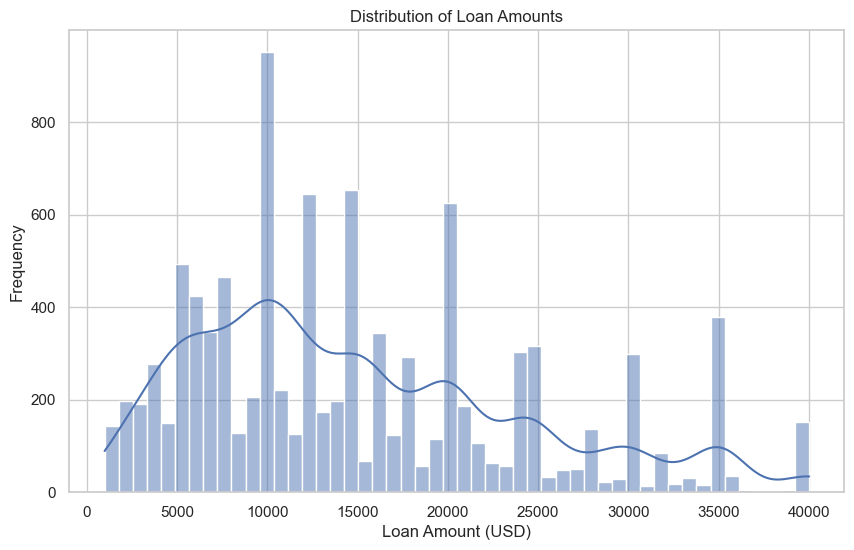

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(df_sample['loan_amnt'], bins=50, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount (USD)')
plt.ylabel('Frequency')
plt.show()

The distribution of loan amounts provides insight into the typical size of consumer loans issued on the Lending Club platform.  
As shown in the histogram above, the majority of loans fall within the **$5,000–$20,000** range, with a strong concentration around **$10,000–$15,000**.

This pattern aligns with Lending Club’s focus on mid-sized unsecured personal loans, which are commonly used for debt consolidation, credit-card refinancing, and general-purpose consumer financing.  

The right tail of the distribution indicates the presence of higher-value loans up to **$40,000**, although these represent a much smaller portion of the portfolio.  
Overall, the distribution suggests a **balanced mix of small and mid-sized loans**, which is consistent with findings in the academic and industry literature on marketplace lending.



#### Interest Rate Distribution

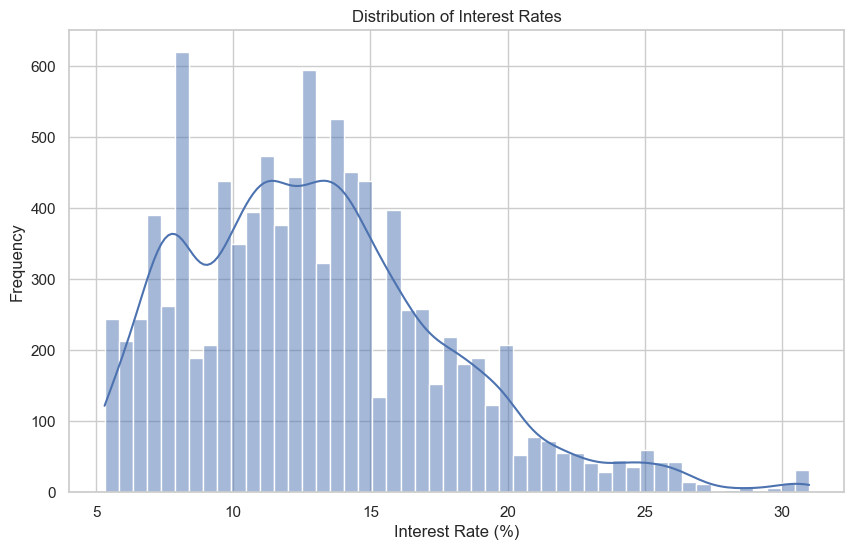

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(df_sample['int_rate'], bins=50, kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

The interest rate (`int_rate`) represents the annual percentage rate assigned to each loan and is one of the key drivers of both borrower affordability and portfolio-level risk. Understanding its distribution provides insight into how Lending Club prices credit risk across different borrower segments.

The histogram above shows that most loans fall within the **10%–15%** interest rate range, which corresponds to borrowers with moderate credit profiles.  
Loans with lower rates (around **6%–10%**) typically reflect stronger borrower creditworthiness, while loans with rates above **20%** represent higher-risk segments.

The long right tail—extending up to **30%**—reveals the presence of subprime loans, though these represent a much smaller share of the overall portfolio.

This distribution aligns with tiered risk-based pricing frameworks observed in the academic and industry literature (e.g., ECB 2022; IACPM 2023), where interest rates increase proportionally with expected credit risk. Overall, the portfolio exhibits a **moderate-risk profile**, which is consistent with the patterns seen in the loan amount distribution.


#### Loan Term (36 vs 60 months)

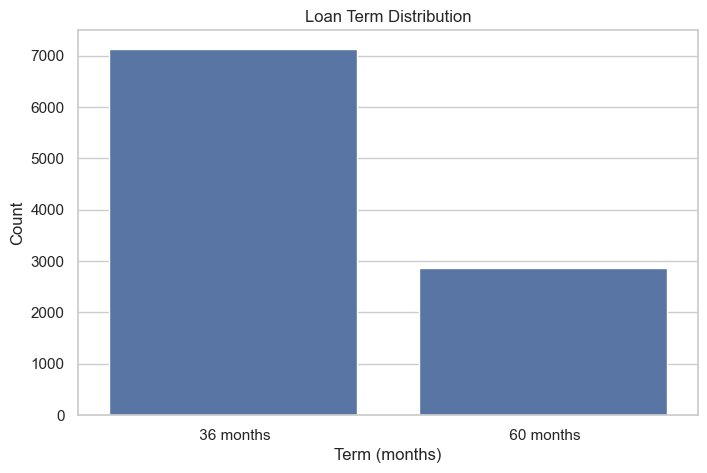

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(x='term', data=df_sample)
plt.title('Loan Term Distribution')
plt.xlabel('Term (months)')
plt.ylabel('Count')
plt.show()

Loan term (`term`) represents the length of time over which the borrower is expected to repay the loan.  
In the Lending Club platform, terms are standardized and available in two options:

- **36 months (3 years)**
- **60 months (5 years)**

The distribution above indicates that the majority of loans—approximately **70%**—are issued with a **36-month term**.  
This reflects the platform’s preference for shorter-duration consumer credit, which typically carries lower default risk and provides faster capital turnover for investors.

In contrast, **60-month loans** represent a smaller portion of the portfolio. These longer-term loans often correspond to borrowers who require lower monthly payments or who fall into slightly higher-risk categories, as longer maturities expose lenders to increased uncertainty over time.

This term distribution aligns with Lending Club’s historical underwriting strategy and with industry patterns reported in ECB (2022) and IACPM (2023), where shorter maturities dominate unsecured consumer lending portfolios.

#### Installment Amounts Distribution

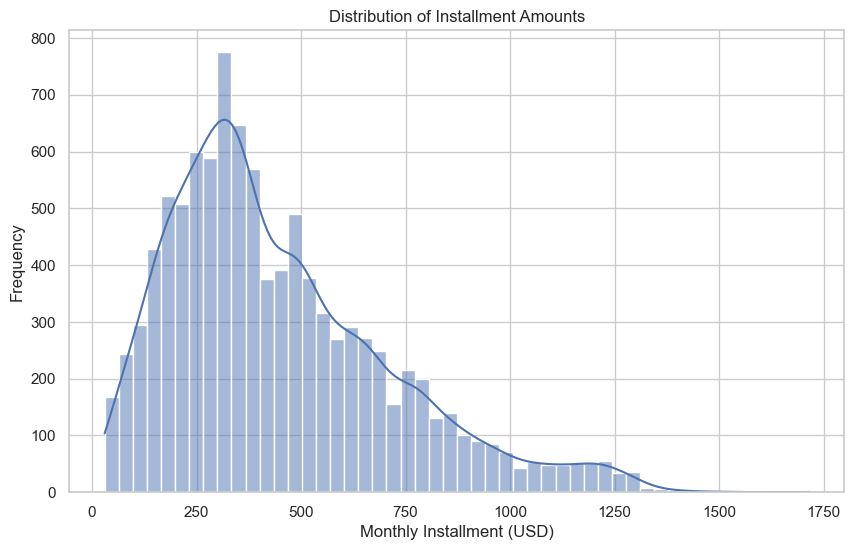

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(df_sample['installment'], bins=50, kde=True)
plt.title('Distribution of Installment Amounts')
plt.xlabel('Monthly Installment (USD)')
plt.ylabel('Frequency')
plt.show()


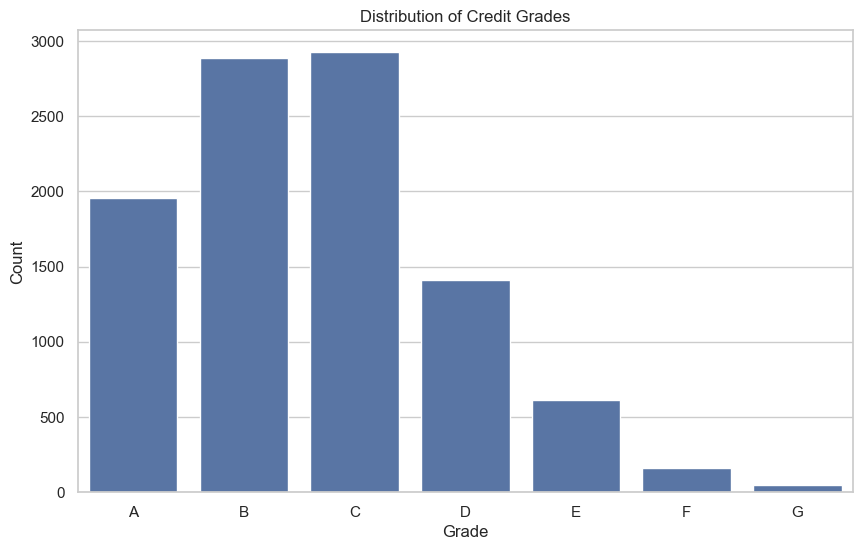

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_sample, x='grade', order=sorted(df_sample['grade'].unique()))
plt.title('Distribution of Credit Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

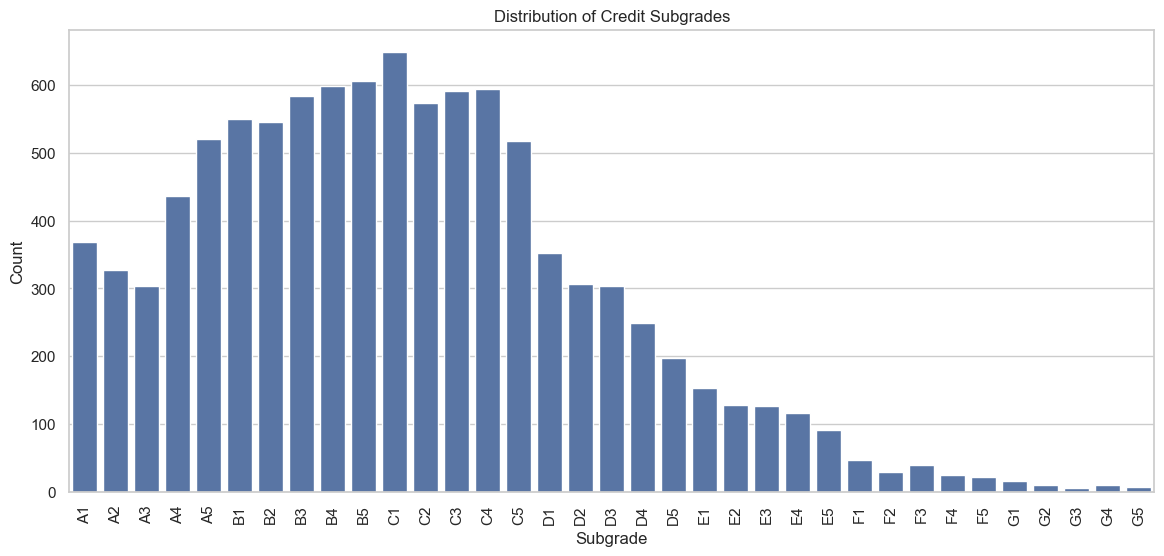

In [62]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_sample, x='sub_grade', 
              order=sorted(df_sample['sub_grade'].unique()))
plt.title('Distribution of Credit Subgrades')
plt.xlabel('Subgrade')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Lending Club assigns each loan an internal credit grade (`grade`) and a more granular subgrade (`sub_grade`) to segment borrowers based on creditworthiness and expected risk.  
These categories form the core of the platform’s risk-pricing and underwriting framework, influencing interest rates, approval outcomes, and expected portfolio performance.

#### Credit Grade Distribution

The overall grade distribution (A–G) shows a strong concentration in the **B** and **C** categories.  
These mid-tier groups represent borrowers with moderate credit risk who typically receive interest rates between 10% and 18%.  
Grade **A** loans — associated with higher-credit-quality borrowers — comprise a smaller but still substantial portion of the portfolio.

Lower-grade categories (**E**, **F**, **G**) appear far less frequently.  
These represent higher-risk borrowers who either receive much higher interest rates or are less commonly approved due to stricter underwriting filters.

This pattern aligns with established findings in marketplace and consumer lending research (ECB 2022; IACPM 2023), which often show a convex distribution centered around mid-risk consumers.

#### Subgrade Distribution

The subgrade distribution provides a more detailed view of the same risk structure.  
Subgrades range from A1 to G5, offering a refined segmentation within each grade.  
The distribution reveals:

- A clear peak around **B3–C5**, representing the densest mid-risk lending zone  
- A gradual decline across D-level subgrades  
- Significantly lower frequencies for E, F, and G subgrades, mirroring their higher risk profile and lower approval likelihood

This granular distribution reflects Lending Club’s risk-based pricing model, where each subgrade corresponds to a specific interest rate tier and expected default probability.

Overall, the combined grade and subgrade patterns confirm a **balanced but moderately risk-leaning portfolio**, characteristic of retail unsecured lending platforms.  
This segmentation framework is essential for later KPI computation, particularly for analyzing interest rate levels, default rates, and portfolio growth across risk tiers.



The credit grade (`grade`) is one of the most important risk-segmentation variables in the Lending Club underwriting framework.  
Each loan is assigned to one of seven categories (A to G), where **A represents the lowest credit risk** and **G the highest**.  
These grades reflect borrower creditworthiness based on factors such as FICO score, credit history, indebtedness, and verified income.

The distribution above shows that the majority of loans fall within the **B** and **C** categories, which together represent the core of the platform’s moderately risky borrower base.  
Grade **A** borrowers account for a smaller but still substantial portion of the portfolio, reflecting higher-credit-quality applicants who qualify for lower interest rates.

Conversely, grades **E**, **F**, and **G** appear far less frequently. These categories correspond to higher-risk borrowers who either face substantially higher interest rates or are less likely to be approved under Lending Club’s underwriting policies.

This pattern is consistent with findings reported in the ECB (2022) and IACPM (2023) studies, where consumer loan portfolios in marketplace lending exhibit a similar concentration around mid-tier risk categories.  
Overall, the grade distribution indicates a **balanced but moderately risk-leaning portfolio**, forming a solid basis for the KPI calculations and risk analysis that follow.


#### Purpose of Loan

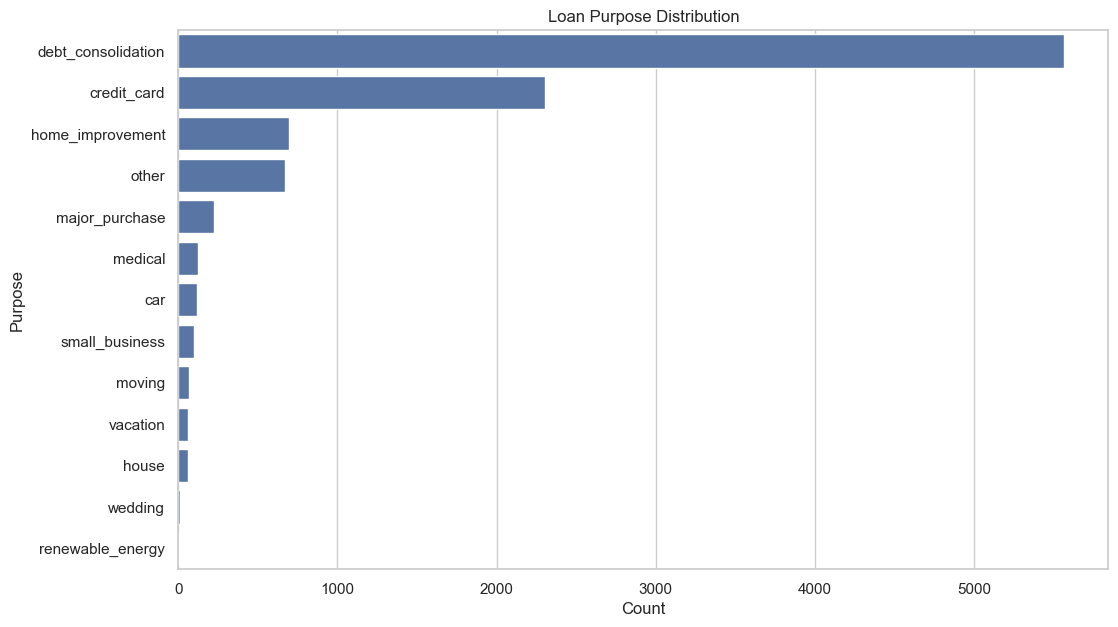

In [63]:
plt.figure(figsize=(12,7))
sns.countplot(y='purpose', data=df_sample, order=df_sample['purpose'].value_counts().index)
plt.title('Loan Purpose Distribution')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

The loan purpose (`purpose`) describes the borrower’s stated reason for requesting credit and provides insight into the structure of demand within the consumer lending market.

The distribution is highly concentrated, with **debt consolidation** representing the dominant category by a wide margin.  
This finding is consistent with the role of marketplace lending platforms in refinancing high-interest revolving credit obligations, particularly credit card balances.

The second most common category is **credit card refinancing**, followed by **home improvement** and **other** personal expenses.  
All remaining categories — such as *major purchase*, *medical*, *car loans*, *small business financing*, *moving*, and *vacation* — appear with significantly lower frequency, forming a long tail of specialized or less common credit needs.

This pattern aligns with results documented in ECB (2022) and IACPM (2023), which report that unsecured personal loans are primarily used for **debt restructuring and consumption smoothing**.  
Overall, the purpose distribution indicates that the Lending Club portfolio is centered around **household financial consolidation**, rather than large asset purchases or business-related borrowing.


### **BORROWER CHARACTERISTICS**

This section provides an overview of the demographic, financial, and behavioral attributes of borrowers in the Lending Club portfolio.  
Understanding these characteristics is essential for interpreting credit risk, repayment capacity, and portfolio segmentation patterns.

The following borrower-related variables are examined:

- **Annual Income (`annual_inc`)** — The borrower’s self-reported yearly income, used as a key indicator of repayment ability.

- **Debt-to-Income Ratio (`dti`)** — Measures the proportion of monthly debt obligations relative to monthly income. A higher DTI indicates a more leveraged borrower and is a core metric in credit underwriting.

- **Employment Length (`emp_length`)** — Represents the number of years the borrower has been employed in their current job. This feature serves as a proxy for income stability and employment reliability.

- **Home Ownership (`home_ownership`)** — Categorizes the borrower’s housing status (e.g., RENT, MORTGAGE, OWN). This attribute is often related to financial stability and asset ownership.

- **Borrower State (`addr_state`)** — Indicates the U.S. state where the borrower resides. It supports geographic segmentation analyses and helps identify regional credit risk patterns.

Each characteristic is further explored in the following subsections through detailed distribution visualizations and commentary.



#### Annual Income Distribution

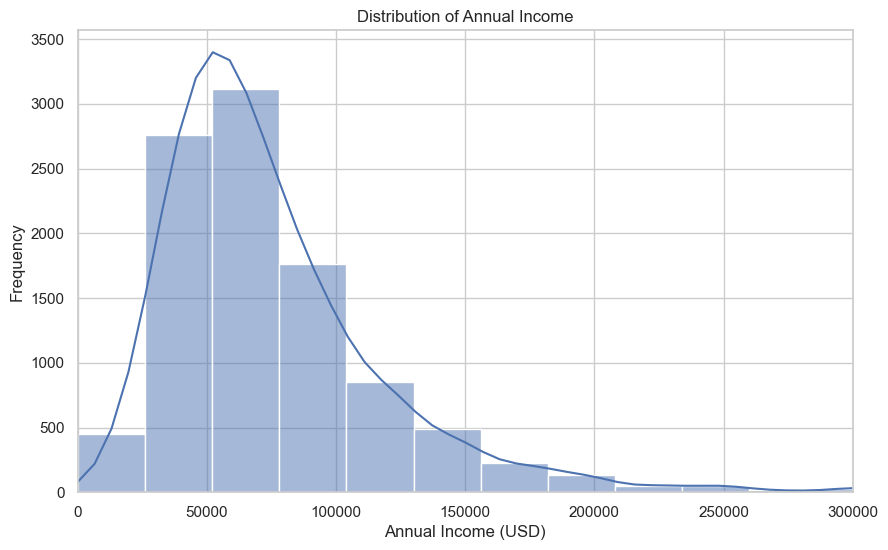

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(df_sample['annual_inc'], bins=50, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Frequency')

plt.xlim(0, 300000)
plt.show()


The annual income (`annual_inc`) variable represents the borrower’s self-reported yearly earnings and is one of the primary indicators of repayment capacity.  
The distribution is strongly **right-skewed**, a common pattern in consumer lending datasets, where the majority of borrowers fall within the low-to-middle income range while a smaller group reports significantly higher earnings.

As shown in the histogram above, most borrowers report incomes between **$40,000 and $100,000**, with the peak occurring around the **$50,000–$70,000** range.  
The distribution gradually declines for higher income levels, forming a long right tail extending up to approximately **$250,000–$300,000**.  
This upper tail reflects a minority of higher-income applicants but does not dominate the overall shape of the portfolio.

These patterns are consistent with findings in ECB (2022) and IACPM (2023), which show that marketplace lending platforms primarily serve **middle-income consumers**, rather than high-income or affluent borrowers.  
Understanding the distribution of borrower income is essential for interpreting leverage (DTI), affordability, and expected credit performance in subsequent analysis.


#### Debt-to-Income Ratio (DTI)

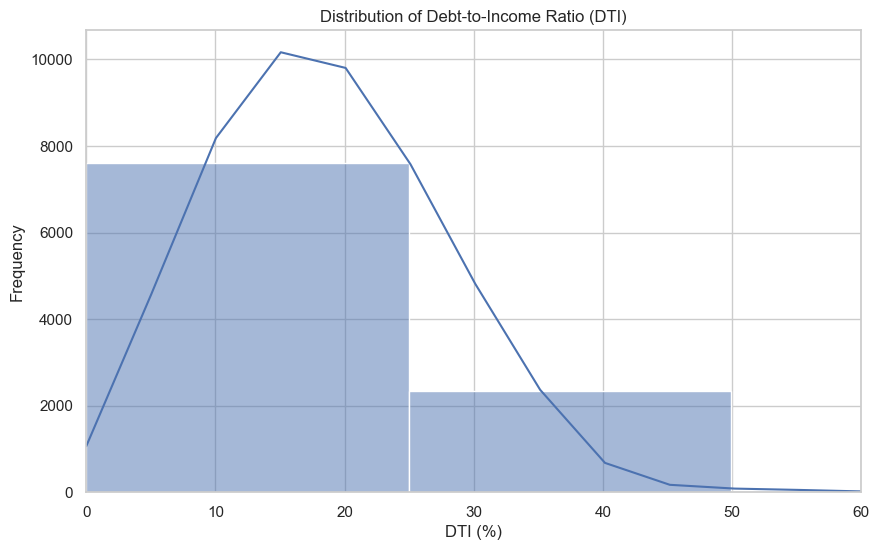

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(df_sample['dti'], bins=40, kde=True)
plt.title('Distribution of Debt-to-Income Ratio (DTI)')

plt.xlim(0, 60)
plt.xlabel('DTI (%)')
plt.ylabel('Frequency')
plt.show()


The Debt-to-Income ratio (DTI) measures the share of a borrower’s monthly gross income that is dedicated to existing debt obligations.  
It is a key indicator of **repayment capacity** and is widely used in credit-risk assessment frameworks, including ECB and IACPM guidelines.

The distribution of DTI in the sampled Lending Club portfolio is **right-skewed**, with most borrowers falling within the **10%–20%** range.  
This indicates that the majority of applicants maintain **moderate leverage**, consistent with typical underwriting standards for unsecured consumer credit.

Higher DTI levels (above 35%) appear less frequently, forming a thinner long-tail up to 50–60%.  
These cases represent borrowers with more constrained financial flexibility and are generally associated with **elevated credit risk** in regulatory literature.

Overall, the DTI distribution suggests that the portfolio is dominated by borrowers with **manageable debt burdens**, reflecting prudent lending and screening practices.

#### Employment Length

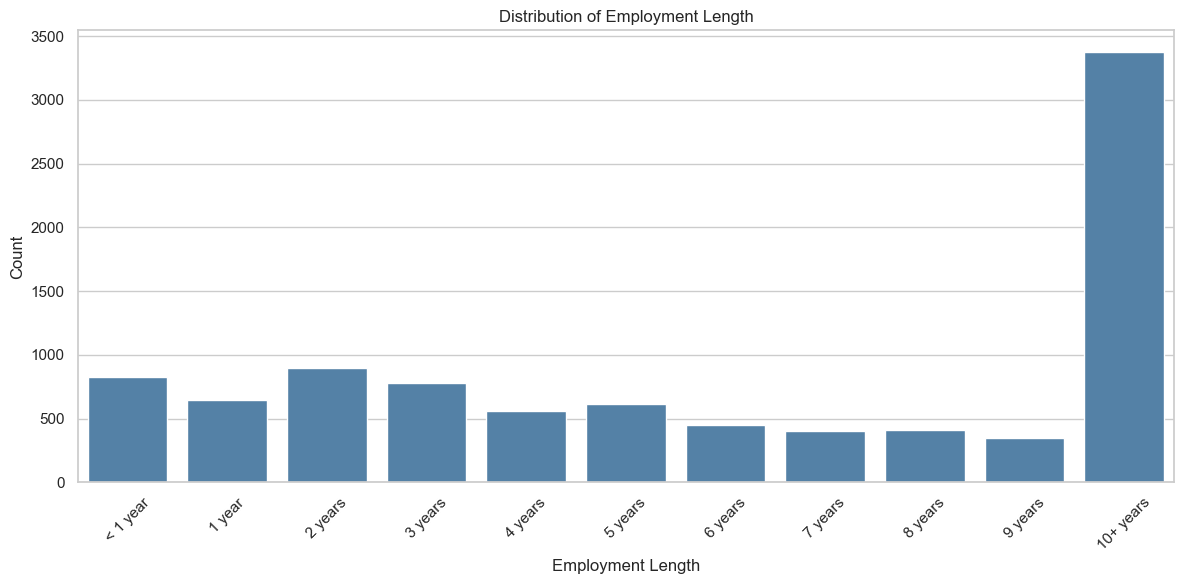

In [66]:
length_raw = df_sample['emp_length']

# Define logical order to display
order = [
    "< 1 year",
    "1 year",
    "2 years",
    "3 years",
    "4 years",
    "5 years",
    "6 years",
    "7 years",
    "8 years",
    "9 years",
    "10+ years"
]

plt.figure(figsize=(12,6))
sns.countplot(
    data=df_sample,
    x='emp_length',
    order=[x for x in order if x in length_raw.unique()],
    color='steelblue'
)

plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The distribution of employment length (`emp_length`) displays a distinctly right-skewed pattern, with **“10+ years”** being by far the most common category.  
This suggests that a large share of borrowers report long-term employment stability, a characteristic typically associated with lower credit risk and higher repayment reliability.

The remaining categories from **0 to 9 years** are more evenly distributed, with slightly higher frequencies in shorter tenures (0–2 years) compared to mid-range values.  
This pattern aligns with findings in consumer-credit literature, where applicants for unsecured personal loans often possess established employment histories but with varying levels of stability.

Overall, the employment length distribution indicates a portfolio where **many borrowers exhibit strong labor-market attachment**, which is a positive indicator for credit performance.

#### Home Ownership Distribution

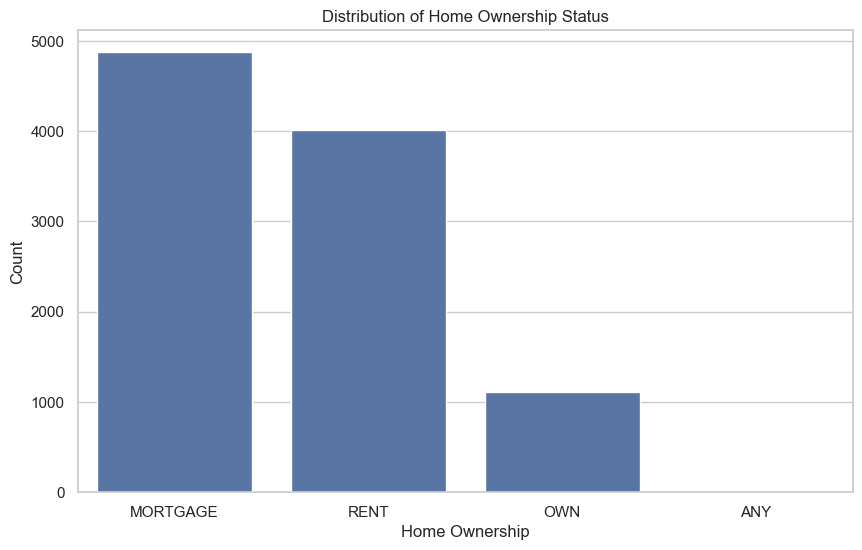

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample, x='home_ownership', order=df_sample['home_ownership'].value_counts().index)
plt.title('Distribution of Home Ownership Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


The *home_ownership* variable captures the borrower’s housing and financial situation, distinguishing between individuals who **rent**, have an **outstanding mortgage**, or **fully own** their residence.

The distribution shows a clear concentration in the **MORTGAGE** and **RENT** categories:

- **Mortgage holders represent the largest group**, indicating that many borrowers are paying off a home loan in parallel with their consumer debt obligations.
- **Renters constitute the second largest segment**, reflecting typical demand for unsecured loans among households without property ownership.
- **Borrowers who fully own their home (OWN)** form a significantly smaller portion of the portfolio.
- A minimal number fall under the ambiguous **ANY** category.

This distribution aligns with typical consumer-lending portfolios documented in ECB (2022), where unsecured loan demand is highest among households with **ongoing mortgage obligations** or **rental expenses**, both of which contribute to higher liquidity needs and refinancing behavior.

#### Borrower Geographic Distribution (State)

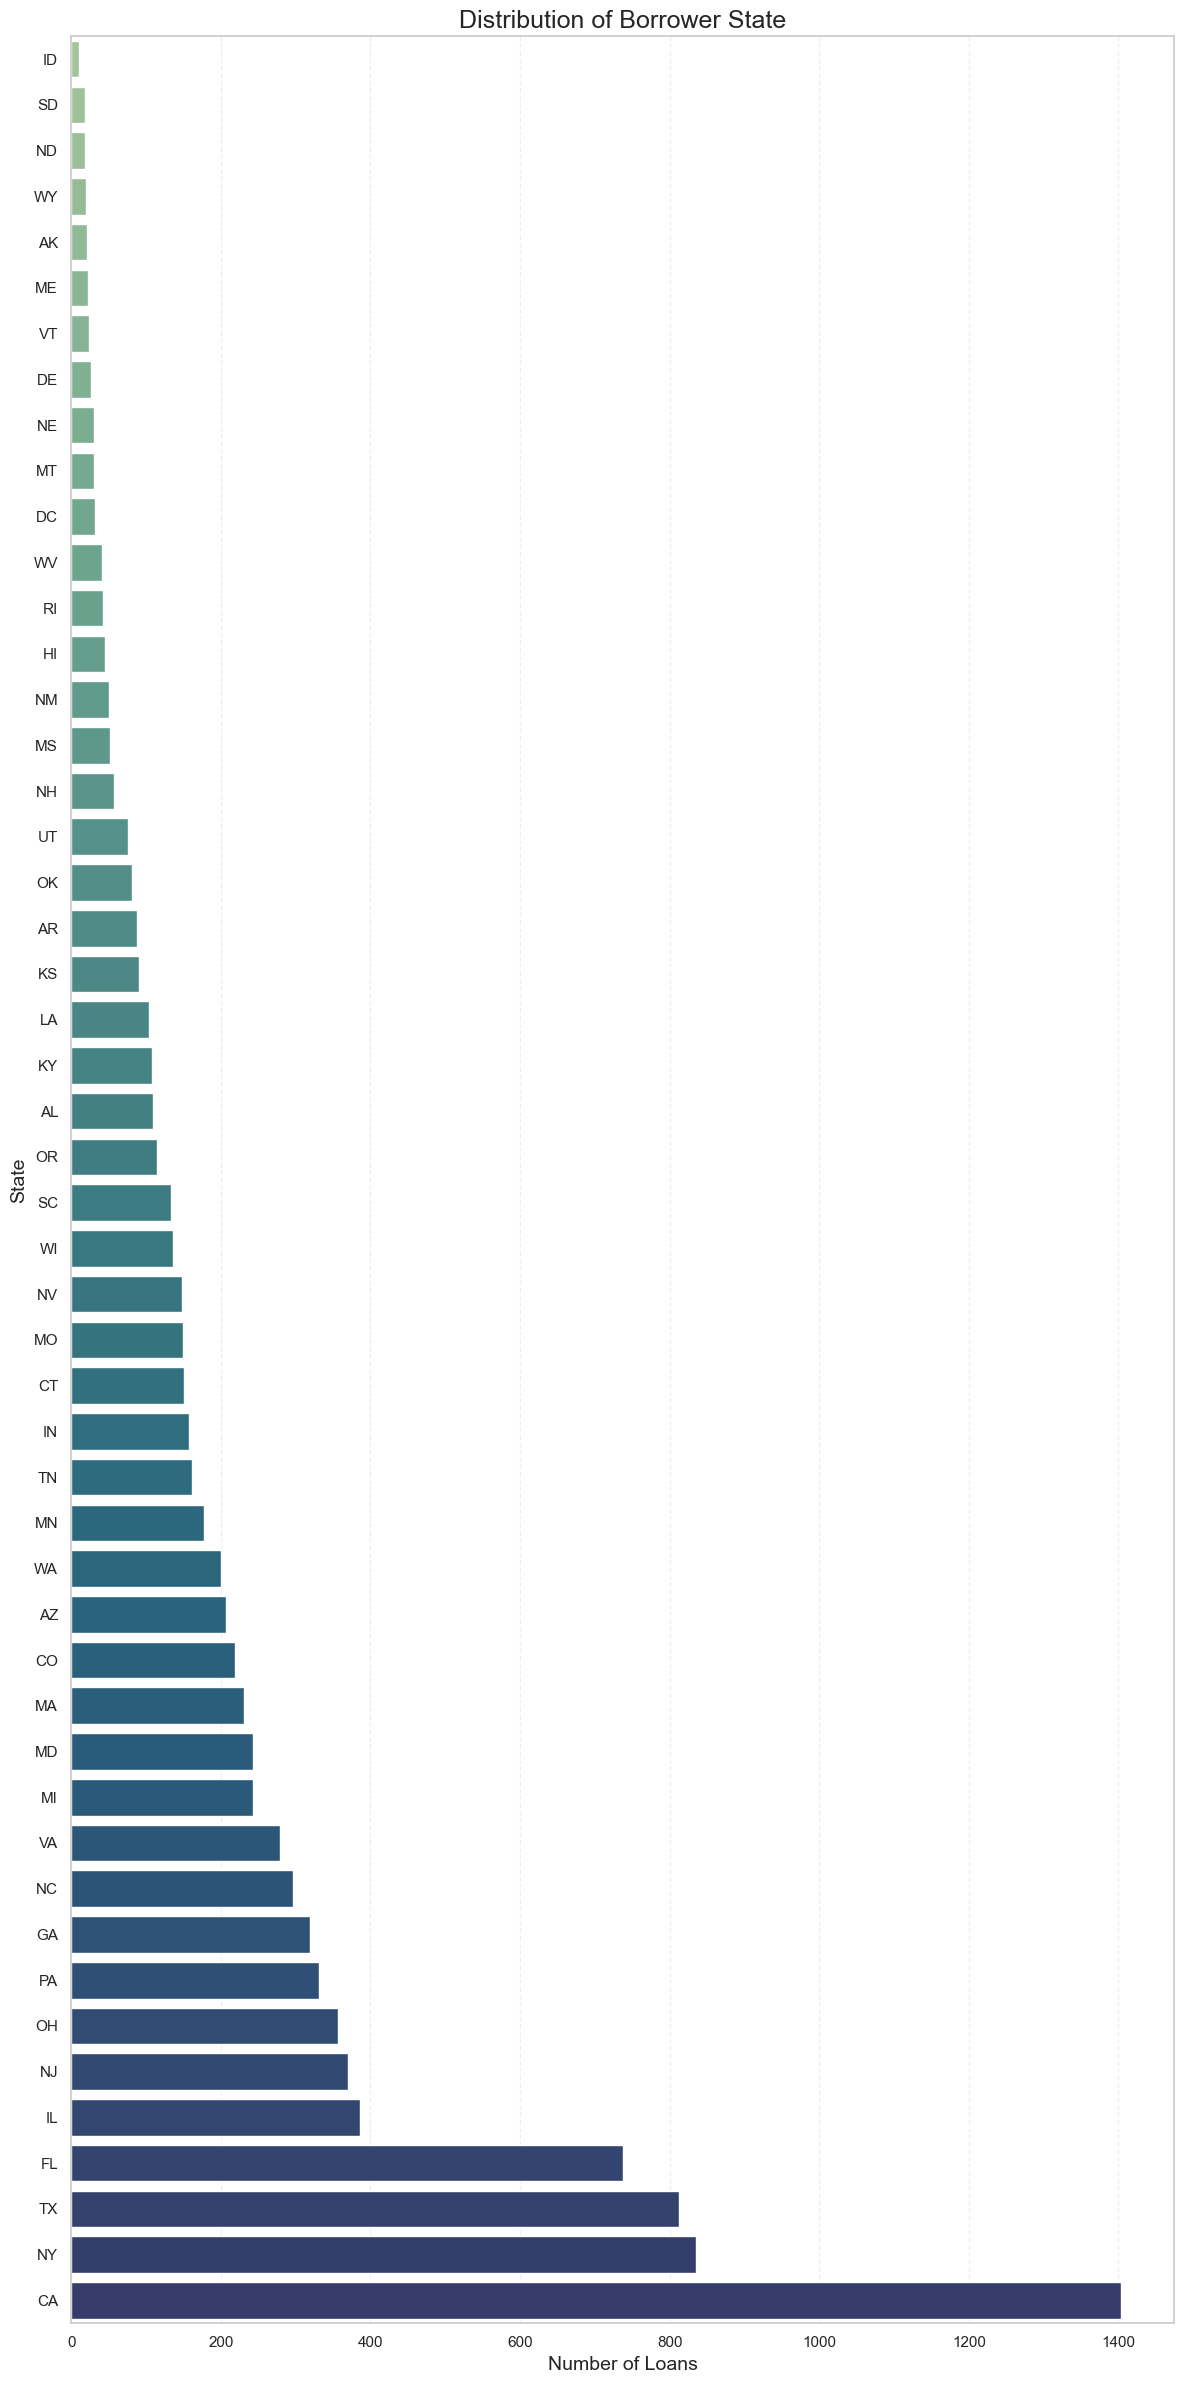

In [68]:
plt.figure(figsize=(12, 24))

state_counts = df_sample['addr_state'].value_counts().sort_values(ascending=True)

sns.barplot(
    x=state_counts.values,
    y=state_counts.index,
    palette=sns.color_palette("crest", n_colors=len(state_counts))  # ΝΕΑ παλέτα (ενιαίο saturation)
)

plt.title("Distribution of Borrower State", fontsize=18)
plt.xlabel("Number of Loans", fontsize=14)
plt.ylabel("State", fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


The geographic distribution of borrowers is highly uneven across U.S. states.  
The horizontal bar chart shows that the highest concentrations of Lending Club borrowers originate from:

- **California (CA)** – by far the dominant state
- **New York (NY)**
- **Florida (FL)**
- **Texas (TX)**
- **Illinois (IL)**
- **New Jersey (NJ)**

These states are also among the most populated in the U.S., which explains their over-representation in the loan portfolio.

On the opposite end, a number of sparsely populated states — such as **ID, SD, ND, WY, AK, VT** — contribute only a very small number of loans.

This distribution is consistent with findings in consumer-credit studies (ECB, 2022; Federal Reserve, 2023), which show that unsecured personal lending is more active in large, urban, high-income states where borrowers rely more heavily on refinancing and credit consolidation.

Overall, the geographic distribution indicates that the Lending Club portfolio is **population-weighted**, with heavy concentration in high-population states and minimal penetration in low-population regions.


### **CREDIT HISTORY INDICATORS**

This section analyzes key aspects of each borrower’s credit history, which play a critical role in assessing creditworthiness and predicting future repayment behavior.  
These indicators capture past delinquencies, recent credit activity, revolving credit utilization, and the breadth and maturity of a borrower's credit profile.

The following variables are examined:

- **Delinquencies in the Past 2 Years (`delinq_2yrs`)** — Counts the number of times the borrower was 30+ days past due within the previous two years.  
  This is one of the most powerful behavioral predictors of future default.

- **Credit Inquiries in the Last 6 Months (`inq_last_6mths`)** — Represents the number of recent “hard” credit pulls.  
  High inquiry frequency may signal financial distress or increased credit-seeking behavior.

- **Revolving Line Utilization (`revol_util`)** — Measures the percentage of revolving credit currently used relative to available limits.  
  High utilization is strongly associated with increased credit risk.

- **Open Credit Lines (`open_acc`)** — Indicates the number of currently active credit accounts.  
  Provides insight into the borrower’s credit activity and management capability.

- **Total Credit Accounts (`total_acc`)** — Captures the total number of credit accounts ever opened by the borrower.  
  A broad credit history may reflect stability, while thin files can indicate limited credit experience.

- **Earliest Credit Line (`earliest_cr_line`)** — Represents the year the borrower’s oldest credit account was opened.  
  This feature serves as a proxy for credit age and experience, both of which correlate with credit performance.

Each indicator is explored in detail in the following subsections through visualizations and analytical commentary.


#### Delinquencies in the Past 2 Years (`delinq_2yrs`)

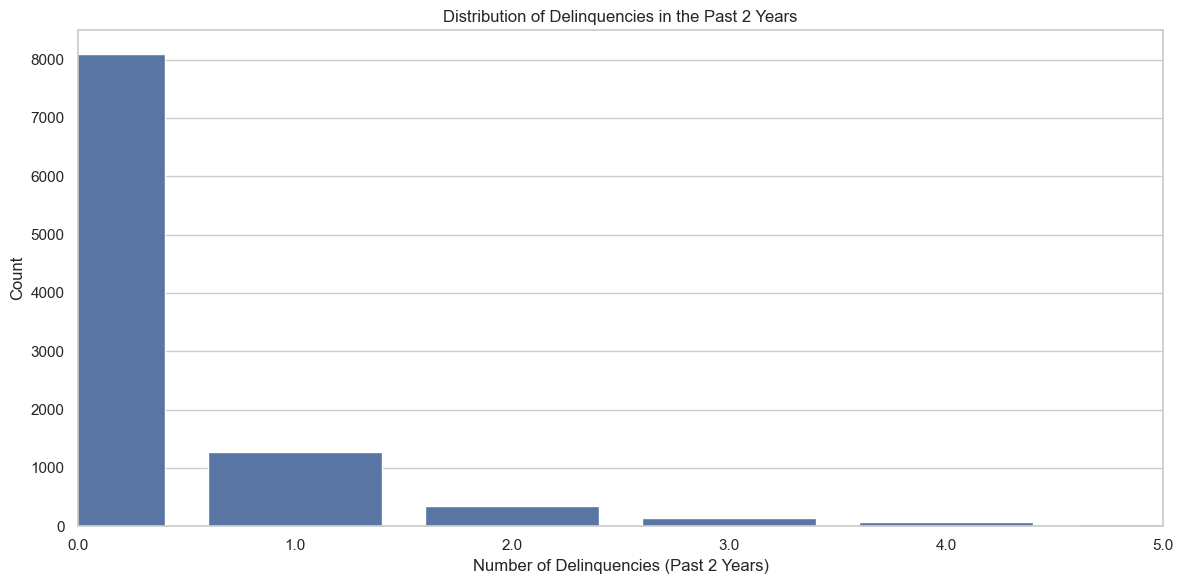

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(x='delinq_2yrs', data=df_sample, color="#4c72b0")

plt.title("Distribution of Delinquencies in the Past 2 Years")

plt.xlim(0, 5)
plt.xlabel("Number of Delinquencies (Past 2 Years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The distribution of delinquencies in the past two years is highly right-skewed, with the vast majority of borrowers showing **zero delinquencies**.

**Key insights:**
- Over **80%** of borrowers have **0 delinquencies**, indicating a generally low-risk borrower base.
- A smaller proportion has **1–2 delinquencies**, with frequency dropping sharply after that.
- Values above **3** are rare and represent isolated higher-risk cases.
- This pattern aligns with findings in ECB and IACPM reports, where recent delinquency history is one of the strongest predictors of default probability.

Overall, the Lending Club portfolio appears to consist mainly of borrowers with stable recent repayment histories and limited credit issues.


#### Credit Inquiries in the Last 6 Months (inq_last_6mths)

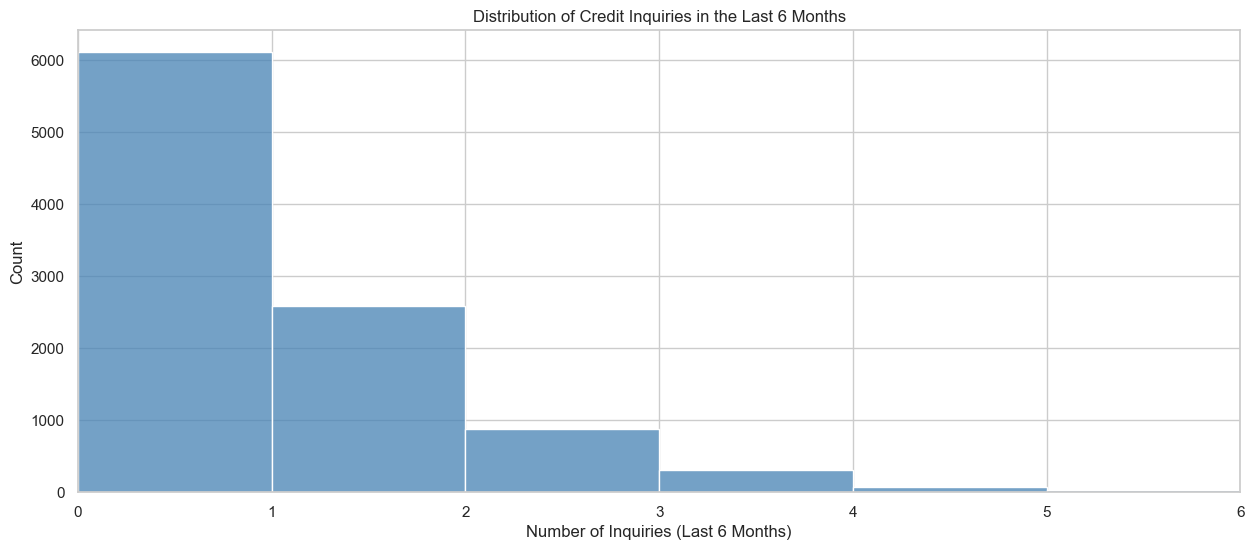

In [70]:
plt.figure(figsize=(15, 6))
sns.histplot(
    df_sample['inq_last_6mths'],
    bins=range(0, 10),
    color='steelblue'
)
plt.title('Distribution of Credit Inquiries in the Last 6 Months')
plt.xlabel('Number of Inquiries (Last 6 Months)')
plt.ylabel('Count')
plt.xlim(0, 6)
plt.show()


The distribution of recent credit inquiries is highly concentrated at the lower end, which is typical for consumer loan portfolios.

**Key observations:**

- The majority of borrowers have **0–1 inquiries**, indicating limited recent credit shopping activity.
- A smaller portion of borrowers shows **2–3 inquiries**, which may signal increased credit demand or financial stress.
- Values above **4 inquiries** are rare, forming a thin right tail.
- This pattern aligns with standard underwriting practices, as high inquiry counts within a short period often signal elevated credit risk and are screened out by lenders.

Overall, the data suggests that most Lending Club applicants demonstrate stable and moderate credit-seeking behavior, consistent with a relatively low-risk borrower base.

#### Revolving Utilization (revol_util)

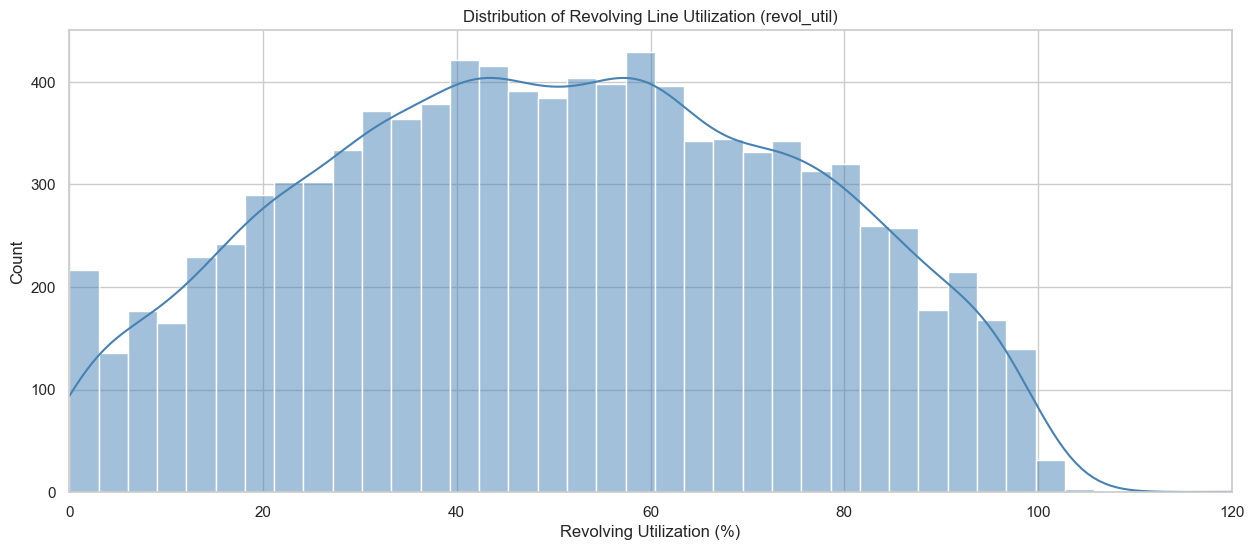

In [71]:
plt.figure(figsize=(15, 6))
sns.histplot(
    df_sample['revol_util'],
    bins=40,
    kde=True,
    color='steelblue'
)
plt.title('Distribution of Revolving Line Utilization (revol_util)')
plt.xlabel('Revolving Utilization (%)')
plt.ylabel('Count')
plt.xlim(0, 120)
plt.show()


Revolving utilization measures how much of a borrower’s available revolving credit (e.g., credit cards) is currently being used. It is a key indicator of borrower liquidity and short-term credit stress.

**Key observations:**

- The distribution shows a broad spread, with most borrowers falling between **20% and 80% utilization**.
- The peak density lies around **40–60%**, which is considered typical for active credit users.
- A non-negligible number of borrowers exhibit **very high utilization (>90%)**, which is generally associated with elevated credit risk.
- Extremely low utilization values also appear, possibly reflecting borrowers with high credit limits relative to spending.

This pattern aligns with credit-risk literature, where revolving utilization is one of the strongest behavioural predictors of default probability, as high utilization often precedes delinquency or financial stress.


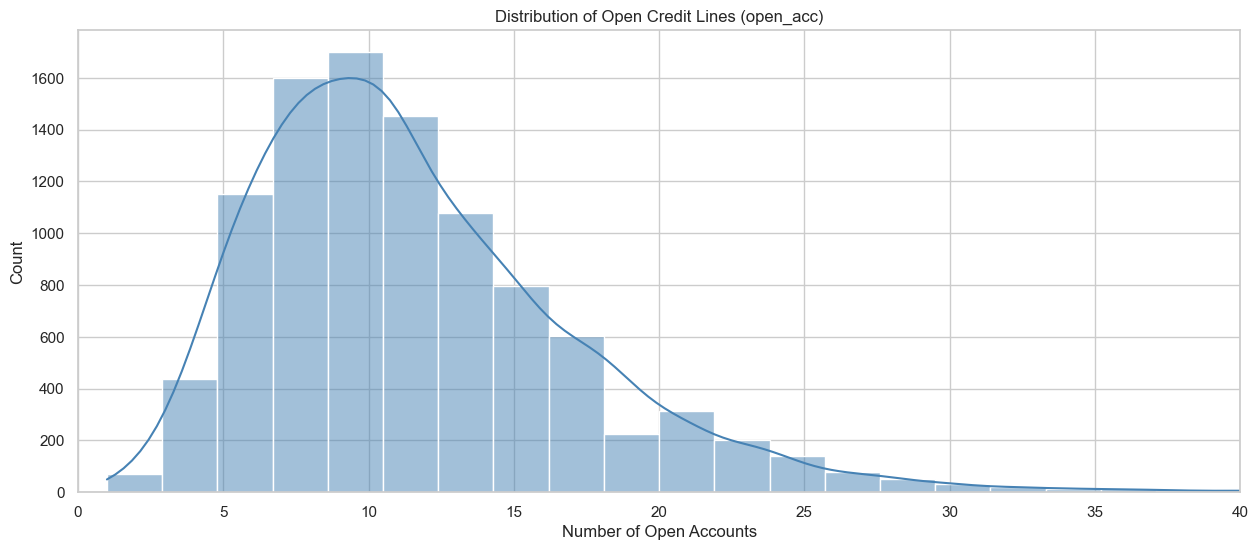

In [72]:
plt.figure(figsize=(15, 6))
sns.histplot(
    df_sample['open_acc'],
    bins=30,
    kde=True,
    color='steelblue'
)
plt.title('Distribution of Open Credit Lines (open_acc)')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Count')
plt.xlim(0, 40)
plt.show()


####  Distribution of Open Credit Lines (`open_acc`) & Total Credit Accounts (`total_acc`)

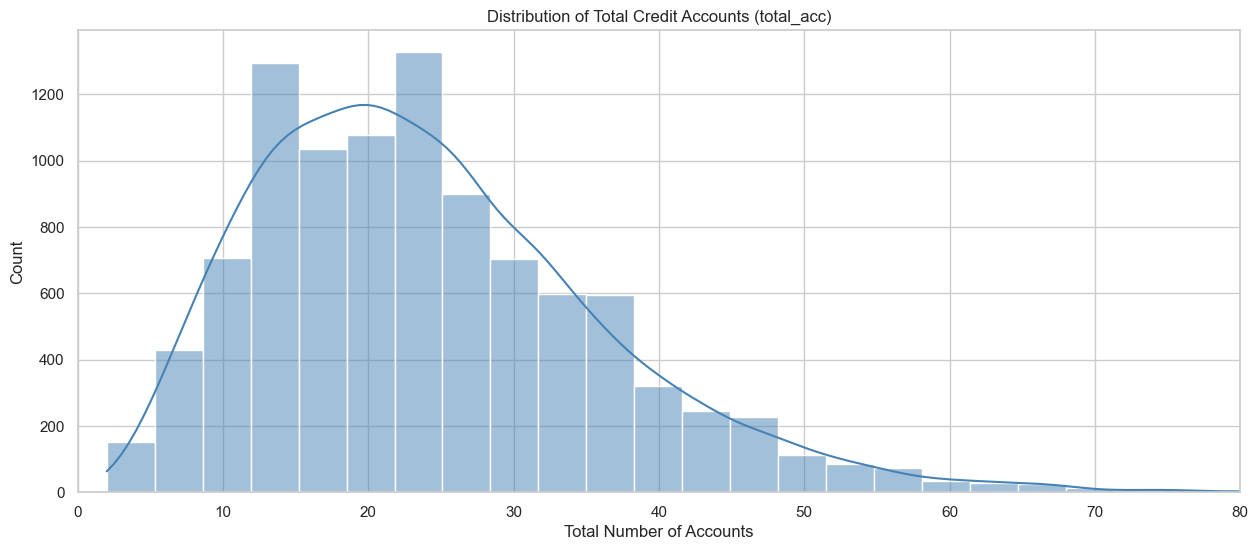

In [73]:
plt.figure(figsize=(15, 6))
sns.histplot(
    df_sample['total_acc'],
    bins=30,
    kde=True,
    color='steelblue'
)
plt.title('Distribution of Total Credit Accounts (total_acc)')
plt.xlabel('Total Number of Accounts')
plt.ylabel('Count')
plt.xlim(0, 80)
plt.show()




This section examines the structure of borrowers’ credit accounts, focusing on:

- **`open_acc`** — number of currently active credit lines  
- **`total_acc`** — total number of credit accounts ever opened  

Both indicators describe different aspects of a borrower’s credit exposure and history.

The distribution of `open_acc` shows that most borrowers maintain **5–15 active accounts**, with a clear peak around **8–11**.  
A long right tail indicates that a small subset of borrowers holds **25+** active accounts.

This reflects **current credit exposure**, which is relevant for assessing short-term repayment pressure.

The `total_acc` distribution is wider, typically ranging between **10–30 total accounts**, with the highest density around **18–22**.  
A long tail extending beyond **60 accounts** suggests borrowers with extensive credit histories.

This variable captures **credit depth and maturity**, reflecting long-term engagement with the credit system.
### Key Takeaways

- Borrowers generally hold a moderate number of active accounts (`open_acc`).  
- They have opened far more accounts over their lifetime (`total_acc`), highlighting the difference between **current credit usage** and **historical credit behavior**.  
- `open_acc` relates to **current leverage**, whereas `total_acc` relates to **credit experience and stability**.  
- Both variables are standard components of **credit risk modeling** and essential for understanding borrower profiles.

#### Credit History Age – Earliest Credit Line (earliest_cr_line)

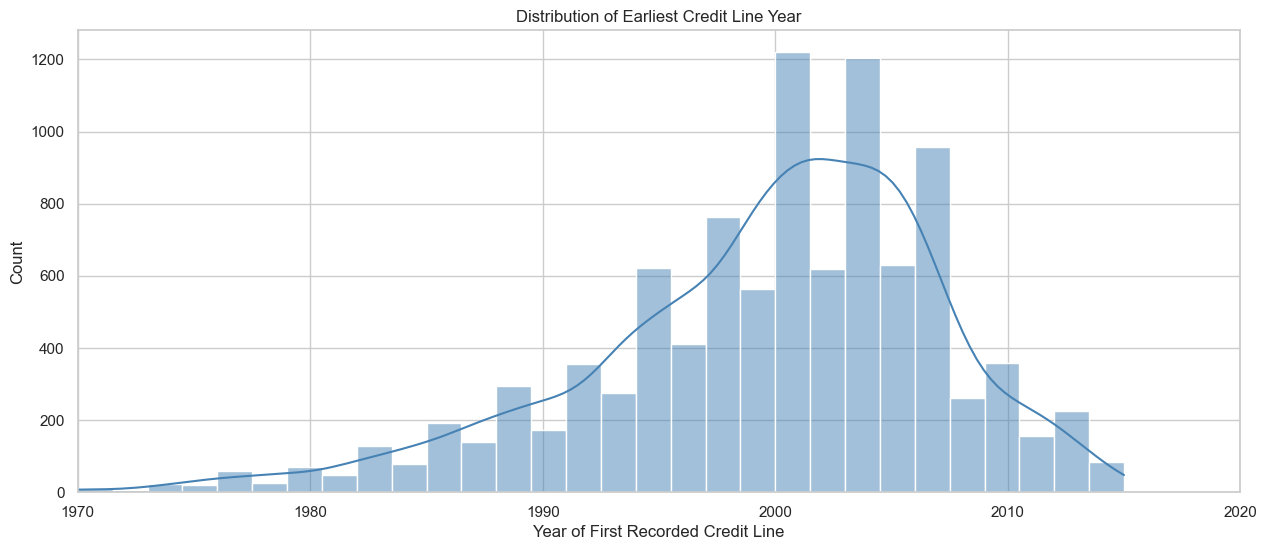

In [74]:
# Convert earliest_cr_line to datetime
df_sample['earliest_cr_line_dt'] = pd.to_datetime(df_sample['earliest_cr_line'], errors='coerce')

# Extract year only
df_sample['earliest_cr_year'] = df_sample['earliest_cr_line_dt'].dt.year

plt.figure(figsize=(15, 6))
sns.histplot(
    df_sample['earliest_cr_year'].dropna(),
    bins=40,
    kde=True,
    color='steelblue'
)

plt.title('Distribution of Earliest Credit Line Year')
plt.xlabel('Year of First Recorded Credit Line')
plt.ylabel('Count')
plt.xlim(1970, 2020)
plt.show()


The variable `earliest_cr_line` captures the **year of the borrower’s first recorded credit line**, and is used as a proxy for the length of credit history.

The distribution is right–skewed and concentrated between **the mid-1990s and the mid-2000s**, indicating that most borrowers have between **10 and 20 years of documented credit history** at the time of loan origination. A smaller mass of observations appears in earlier decades (late 1970s–1980s), corresponding to more seasoned borrowers with very long credit histories, while relatively few borrowers have first credit lines after 2010.

Overall, the portfolio is dominated by borrowers with **established but not extremely long** credit histories, consistent with the typical target segment of unsecured consumer lending platforms.


### **LOAN PERFORMANCE**


This section evaluates how loans in the portfolio have performed over time.  
Understanding performance outcomes is essential for computing portfolio-level KPIs such as **Default Rate**, **Recovery Rate**, **Portfolio Yield**, and **Cashflow Realization**.
The following variables are examined:

-**Loan Status (`loan_status`)**: This field captures the current or final repayment state of each loan in the dataset.  
Statuses include:

- *Fully Paid*: Loan has been completely repaid.
- *Current* — Borrower is up to date on scheduled payments.
- *Charged Off* — Lender has written off the loan as a loss.
- *Late (16–30 days)* — Borrower is slightly behind on payments.
- *Late (31–120 days)* — Borrower is significantly delinquent.
- *In Grace Period* — Payment is overdue but within the grace window.
- *Does not meet the credit policy: Fully Paid / Charged Off* — Historical Lending Club categories used for loans issued under older policies.

These categories provide insight into the distribution of outcomes and the relative frequency of **successful repayment vs. delinquency vs. default**.

Later in the KPI calculation stage, loan statuses will be **grouped** into meaningful risk buckets:

- *Paid**→ Fully Paid  
- *Current**→ Active & performing  
- *Late**→ 16–30 days & 31–120 days  
- *Default**→ Charged Off  

This grouping enables stable measurement of **Default Rate** and related portfolio KPIs.

-**Total Payment (`total_pymnt`)**: Represents the total amount the borrower has paid over the life of the loan, including principal and interest.  
This metric reflects:

- Cashflow actually received.
- Variance between expected vs. realized payments.
- Impact of early repayment or delinquency.

Higher dispersion in total payments may indicate differences in **loan terms**, **borrower risk**, or **early settlement behavior**.

-**6.3 Total Received Principal (`total_rec_prncp`)**: Tracks the portion of principal actually recovered by the lender.  
This value is critically important for KPI calculations such as:

- *Net Loss Rate*
- *Principal Recovery Ratio*
- *Default Exposure at Loss (EAL)*

Loans that default typically show **partial** or **zero** principal recovery.


-**6.4 Recoveries (`recoveries`)**: Represents **funds recovered after a loan was charged off**, often through:

- *Collections activity*  
- *Asset recovery*  
- *Legal action*  

In most consumer portfolios — including Lending Club — recoveries tend to be **very small**, resulting in:

- Low overall **Loss Given Default (LGD) recovery offsets**
- Minimal impact on net charge-off calculations

In this dataset, recoveries are nearly zero for the majority of charged-off loans, consistent with industry benchmarks (IFC, 2022; IACPM, 2023).

Together, these performance indicators provide the foundation for:

- **Default Rate estimation**
- **Portfolio cashflow analysis**
- **Risk-adjusted performance metrics**
- **Comparisons against regulatory and industry benchmarks**

These metrics will be fully leveraged in the KPI Calculation section using the curated `loan_portfolio_features.csv` dataset.


#### Loan Status Distribution

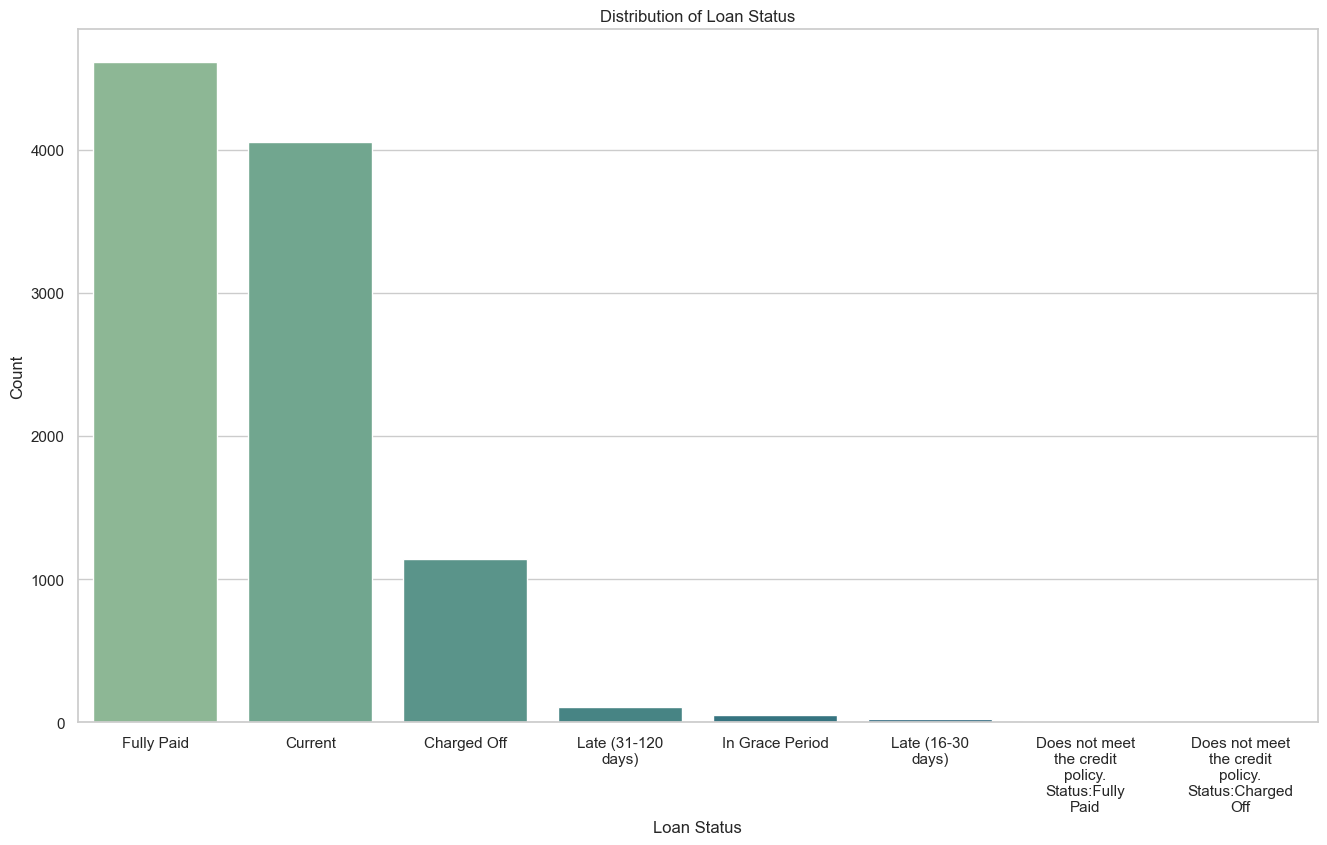

In [75]:
# Create wrapped version of loan_status for readability
df_sample['loan_status_wrapped'] = (
    df_sample['loan_status']
    .apply(lambda x: "\n".join(textwrap.wrap(str(x), width=15)))
)

# Plot
plt.figure(figsize=(16, 9))
sns.countplot(
    data=df_sample,
    x='loan_status_wrapped',
    order=df_sample['loan_status_wrapped'].value_counts().index,
    palette="crest",
)

plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



The variable **`loan_status`** provides a direct snapshot of portfolio performance by indicating whether each loan is fully repaid, active, delinquent, or in default.

The distribution is dominated by the categories **“Fully Paid”** and **“Current”**, which together represent the majority of performing loans in the sample.  
A smaller but important portion falls under **“Charged Off”**, representing defaulted loans that will feed into the **Default Rate KPI**.

Lower-frequency categories such as **“Late (31–120 days)”**, **“Late (16–30 days)”**, and **“In Grace Period”** correspond to early delinquency stages, where borrowers are behind on payments but have not yet defaulted.

Categories like:

- *Does not meet the credit policy: Status:Fully Paid*  
- *Does not meet the credit policy: Status:Charged Off*

reflect legacy Lending Club accounts that did not meet updated underwriting criteria but remain in the historical dataset for completeness.

Overall, the distribution confirms a typical consumer-credit pattern:  
**high concentration in performing loans, predictable share of defaults, and a small portion moving through delinquency stages.**


#### Payment & Recovery Metrics

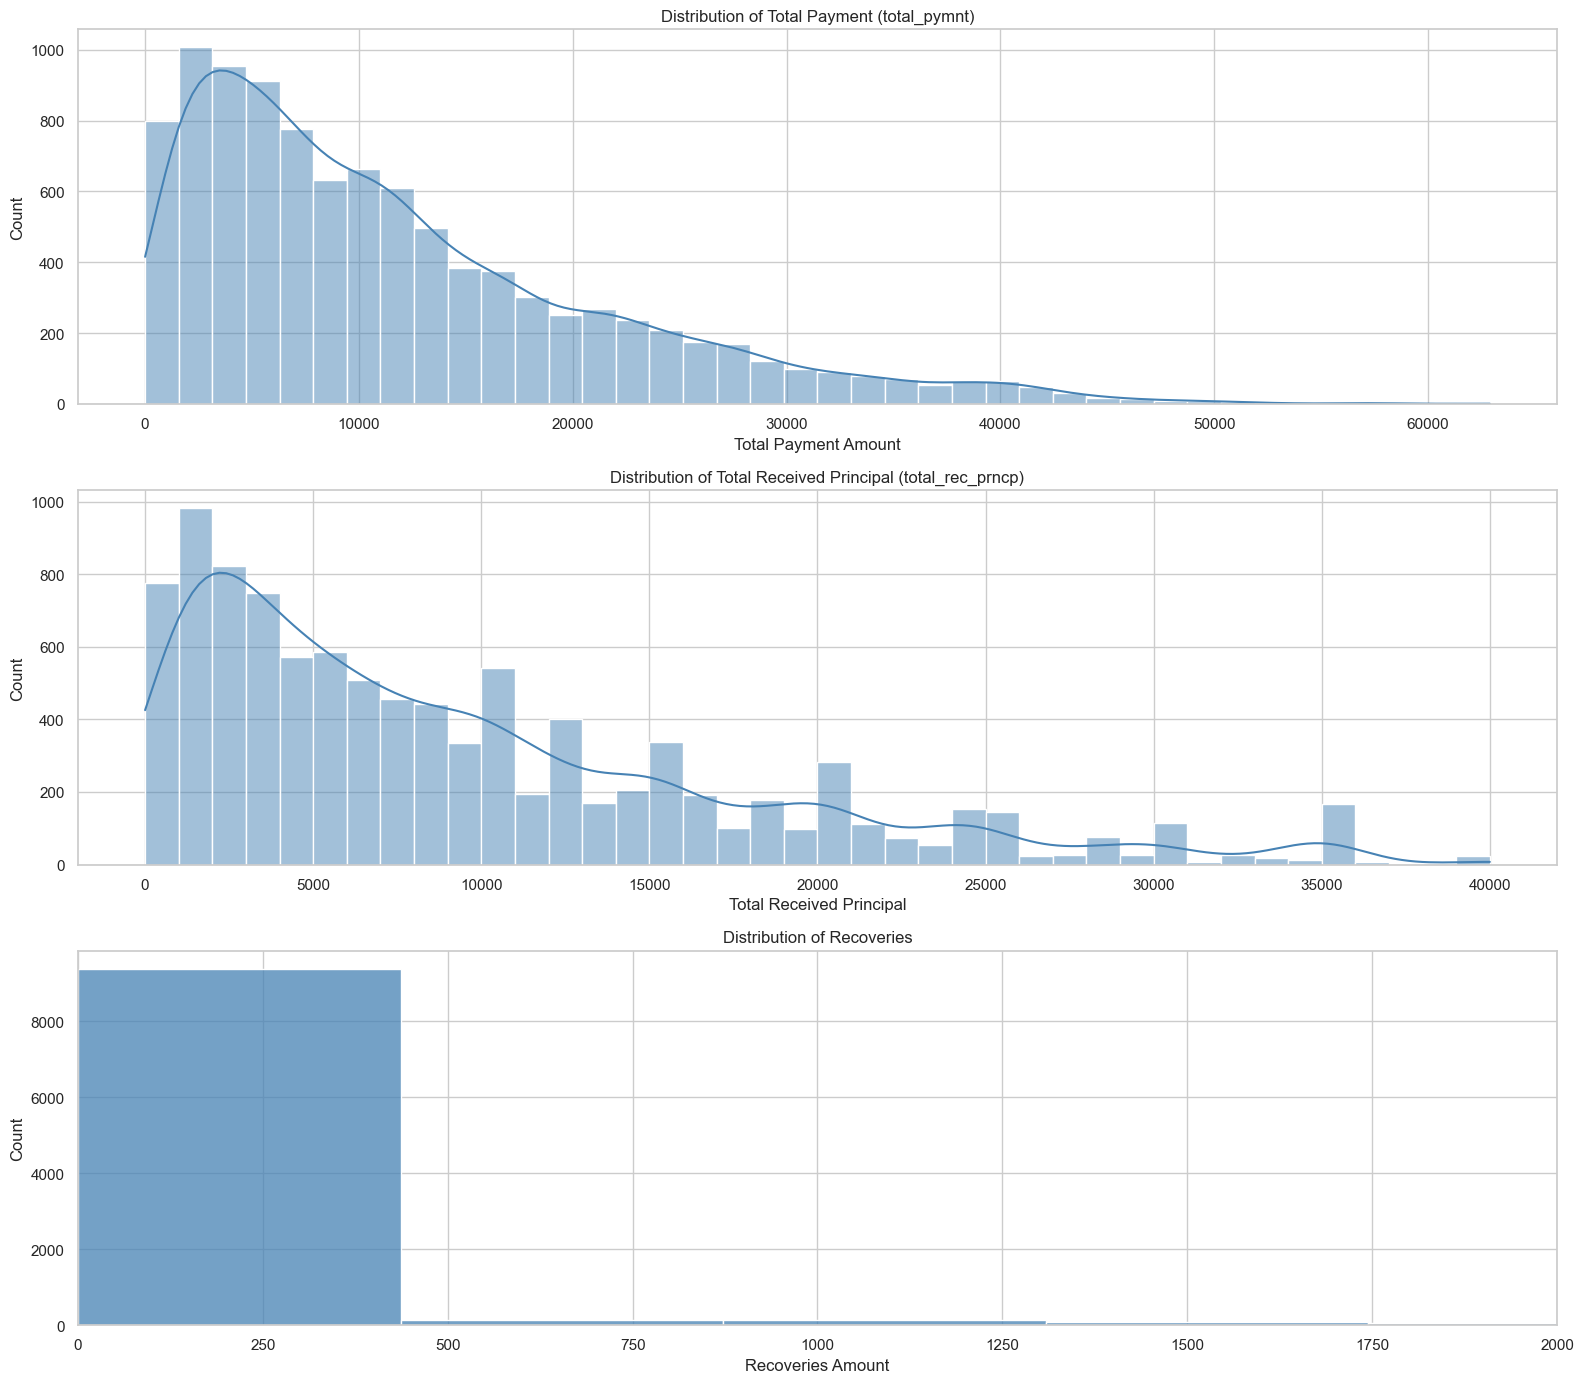

In [76]:
plt.figure(figsize=(16, 14))

# --- 1. Total Payment ---
plt.subplot(3, 1, 1)
sns.histplot(
    df_sample['total_pymnt'].dropna(),
    bins=40,
    kde=True,
    color='steelblue'
)
plt.title('Distribution of Total Payment (total_pymnt)')
plt.xlabel('Total Payment Amount')
plt.ylabel('Count')


# --- 2. Total Received Principal ---
plt.subplot(3, 1, 2)
sns.histplot(
    df_sample['total_rec_prncp'].dropna(),
    bins=40,
    kde=True,
    color='steelblue'
)
plt.title('Distribution of Total Received Principal (total_rec_prncp)')
plt.xlabel('Total Received Principal')
plt.ylabel('Count')


# --- 3. Recoveries ---
plt.subplot(3, 1, 3)
sns.histplot(
    df_sample['recoveries'].dropna(),
    bins=40,
    color='steelblue'
)
plt.title('Distribution of Recoveries')
plt.xlabel('Recoveries Amount')
plt.ylabel('Count')

plt.xlim(0, 2000)
plt.tight_layout()
plt.show()


To better understand repayment behavior and cashflow dynamics within the Lending Club portfolio, we examine three key performance variables:  
**total_pymnt**, **total_rec_prncp**, and **recoveries**.  
These metrics provide insight into how much borrowers ultimately paid, how much principal was recovered, and whether any funds were retrieved after charge-off events.

Total Payment Amount (`total_pymnt`) : The distribution is **right-skewed**, with most loans clustering at lower total payment amounts. Higher values represent loans with larger balances and full-term repayment.

Total Received Principal (`total_rec_prncp`) : This variable follows a similar pattern to total payments but reflects **only principal repayment**.  
Most borrowers repay relatively standard mid-sized loan amounts (5k–15k).

Recoveries (`recoveries`) : Recoveries are **near-zero for the majority** of loans, indicating that when loans charge off, actual funds recovered are minimal.  
A small number of cases show moderate recovery amounts, but these are rare.

Together, these distributions demonstrate the expected repayment structure of unsecured consumer credit:  
regular amortized payments for most borrowers, and low recovery rates following charge-off.


### **CORRELATION ANALYSIS** 

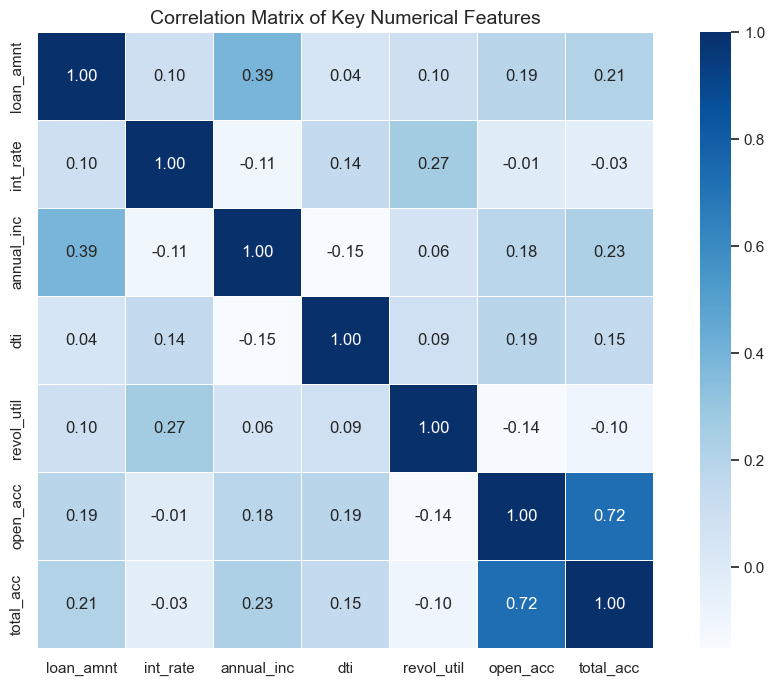

In [77]:
## Correlation Analysis of Key Numerical Features
corr_features = [
    'loan_amnt',
    'int_rate',
    'annual_inc',
    'dti',
    'revol_util',
    'open_acc',
    'total_acc'
]

df_corr = df_sample[corr_features].copy()

# Compute correlation matrix
corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    linewidths=0.5,
    square=True
)

plt.title('Correlation Matrix of Key Numerical Features', fontsize=14)
plt.show()


To understand the linear relationships among the core numerical variables of the loan portfolio, a correlation matrix was generated using the most analytically relevant features:

- **loan_amnt** – approved loan amount  
- **int_rate** – interest rate  
- **annual_inc** – borrower’s annual income  
- **dti** – debt-to-income ratio  
- **revol_util** – revolving credit utilization  
- **open_acc** – number of open credit lines  
- **total_acc** – total credit accounts on file  

The correlation heatmap below reveals several important patterns:

### **Key Observations**
- A **moderate positive correlation** exists between **annual_inc** and **loan_amnt** (`r ≈ 0.39`), meaning higher-income borrowers tend to take larger loans.
- **open_acc** and **total_acc** show a **strong positive correlation** (`r ≈ 0.72`), as expected, since open accounts form a subset of total credit accounts.
- **int_rate** has **weak correlations** with all variables, indicating that interest rates in the Lending Club dataset depend more on categorical risk factors (e.g., grade/subgrade) than on numerical credit ratios.
- **dti**, **revol_util**, and **open_acc** demonstrate only **weak relationships** with loan amount and income, suggesting diverse borrower credit profiles.

Overall, the correlations confirm that the selected variables do **not exhibit problematic multicollinearity** (no pair above |0.80|), meaning they are safe for downstream KPI calculations and feature engineering.

In [78]:
output_path = DATA_DIR / "eda_processed.csv"
df_eda.to_csv(output_path, index=False)

print(f"Saved to: {output_path}")

Saved to: c:\Users\parda\OneDrive\Desktop\Thesis\MasterThesis_DataEngineering_EleftheriaPardali\data\processed\eda_processed.csv


### **Conclusion of Exploratory Data Analysis (EDA)**

The exploratory analysis provided a comprehensive understanding of the loan portfolio's structure, borrower profiles, credit history characteristics, and repayment performance.  
Several key insights emerged:

#### **Portfolio Structure**
Loan amounts, interest rates and terms demonstrated patterns consistent with unsecured consumer lending, with most loans falling into mid-range amounts and interest brackets. Grade and subgrade distributions confirmed the platform’s risk-based pricing framework.

#### **Borrower Characteristics**
Borrowers were predominantly middle-income individuals with stable employment profiles.  
DTI values and revolving credit utilization showed generally manageable leverage levels, while employment length and homeownership categories suggested a financially active and reasonably stable borrower base.

#### **Credit History Indicators**
Most borrowers exhibited clean credit histories with few delinquencies or recent inquiries.  
Open and total account counts reflected established credit profiles, while the age of credit history aligned with typical U.S. consumer credit patterns.

#### **Loan Performance**
The majority of loans were either Fully Paid or Current, with Charged Off loans forming a smaller but meaningful portion of the dataset.  
Payment performance variables (total payments, principal received, recoveries) revealed the expected lifecycle behaviors, including very low recovery rates typical of unsecured consumer loans.

#### **Data Readiness**
Missing values were minimal and handled appropriately.  
Correlation analysis showed no harmful multicollinearity among KPI-related numerical variables, confirming that the dataset is structurally sound for transformation and modeling.

Overall, the EDA phase establishes a clear quantitative and qualitative picture of the Lending Club portfolio and validates that the dataset is ready for **Feature Engineering**, including variable cleaning, transformation, and the construction of KPI-oriented fields required for loan portfolio monitoring.
